<a href="https://colab.research.google.com/github/DSLUCIFER/Network-intrusion-detection/blob/main/NIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [79]:
data = pd.read_csv('/content/final(2) (1).csv')

In [80]:
print(data.columns)

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')


In [81]:
print(data.head())

   Time Protcol Flag    Family  Clusters SeddAddress ExpAddress  BTC  USD  \
0    50     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  500   
1    40     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  504   
2    30     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  508   
3    20     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  512   
4    57     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  516   

   Netflow_Bytes IPaddress Threats  Port Prediction  
0              5         A   Bonet  5061         SS  
1              8         A   Bonet  5061         SS  
2              7         A   Bonet  5061         SS  
3             15         A   Bonet  5061         SS  
4              9         A   Bonet  5061         SS  


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB


In [83]:
# Identify categorical variables
categorical_cols = ['Protcol', 'Flag', 'Family']

In [84]:
X_categorical = pd.get_dummies(data[categorical_cols])

In [85]:
# Numerical features
numerical_cols = ['Time', 'Clusters', 'BTC', 'USD', 'Netflow_Bytes', 'Threats', 'Port']  # Assuming these are numerical columns
X_numerical = data[numerical_cols]

In [86]:
# Concatenate one-hot encoded features with numerical features
X = pd.concat([X_categorical, X_numerical], axis=1)

In [87]:
for column in X.columns:
    if X[column].dtype == "object":
        print(column)

Threats


In [88]:
X = X.drop(columns=["Threats"])

In [89]:
# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [90]:
print(X_normalized)

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 3.94847204e-03
  3.23650781e-04 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 3.98012312e-03
  5.66388866e-04 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 4.01177420e-03
  4.85476171e-04 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.26683442e-02
  2.71947569e-01 1.42857143e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.27158208e-02
  2.72837608e-01 1.42857143e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.27632974e-02
  2.73727648e-01 1.42857143e-01]]


In [91]:
train=pd.read_csv('/content/final(2) (1).csv')

In [92]:
test=pd.read_csv('/content/final(2) (1).csv')

<Axes: xlabel='Prediction', ylabel='count'>

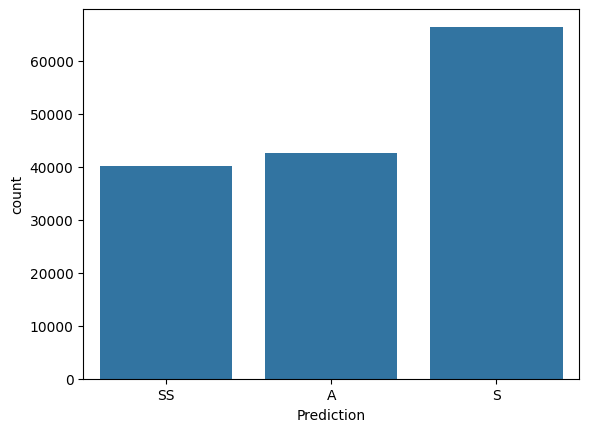

In [93]:
sns.countplot(x='Prediction', data=train)

<Axes: xlabel='Threats', ylabel='count'>

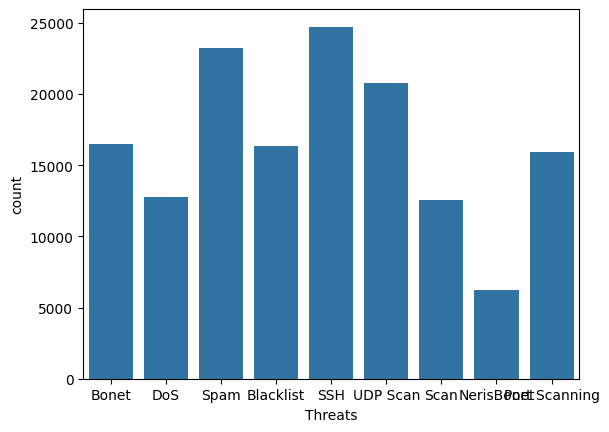

In [94]:
sns.countplot(x='Threats', data=train)

In [95]:
# Splitting normalized data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [96]:
# Model training
# Using Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='rbf', gamma='auto')  # You can experiment with different kernels and parameters
svm_classifier.fit(X_train, y_train)

SVC(gamma='auto')

In [97]:
# Model evaluation
y_pred = svm_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        ICMP       1.00      1.00      1.00      7396
         TCP       1.00      1.00      1.00     13705
         UDP       1.00      1.00      1.00      8708

    accuracy                           1.00     29809
   macro avg       1.00      1.00      1.00     29809
weighted avg       1.00      1.00      1.00     29809

